<a href="https://colab.research.google.com/github/ashbornarise/Machine-Learning-research/blob/main/Copy_of_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_train), len(y_test)

(40, 40, 40, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s = 4, label="training")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None :
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  plt.legend(prop = {"size":14});

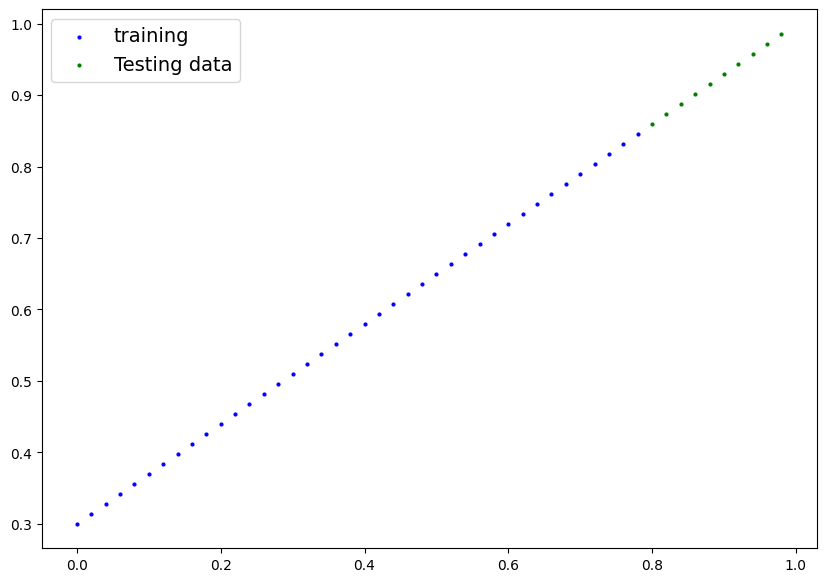

In [ ]:
plot_predictions()

In [ ]:
## Build model

#Create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias


In [ ]:
#torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.6518], requires_grad=True),
 Parameter containing:
 tensor([-0.2108], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6518])), ('bias', tensor([-0.2108]))])

In [ ]:
weight, bias

(0.7, 0.3)

Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


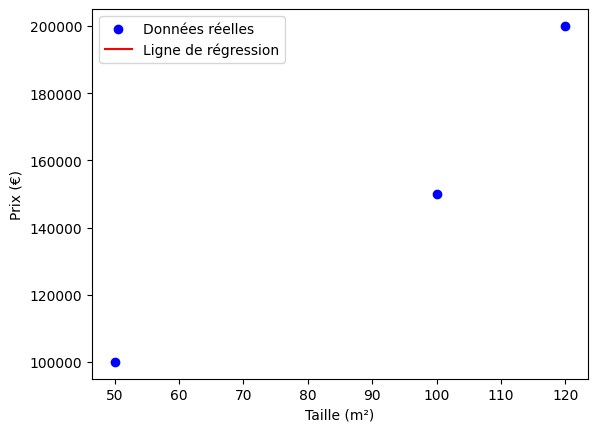

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


X = np.array([50, 100, 120], dtype = np.float32)
Y = np.array([100000, 150000, 200000], dtype = np.float32)

X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

model = nn.Linear(in_features=1, out_features=1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs):

  outputs = model(X)
  loss = criterion(outputs, Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%100 == 0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():4f}")

predicted_values = model(X).detach().numpy()

plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Données réelles')
plt.plot(X.numpy(), predicted_values, color='red', label='Ligne de régression')
plt.xlabel('Taille (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.show()

Exercice 1


Epoch [199/2000], Loss:1.082077
Epoch [399/2000], Loss:0.485819
Epoch [599/2000], Loss:0.218118
Epoch [799/2000], Loss:0.097928
Epoch [999/2000], Loss:0.043967
Epoch [1199/2000], Loss:0.019740
Epoch [1399/2000], Loss:0.008863
Epoch [1599/2000], Loss:0.003979
Epoch [1799/2000], Loss:0.001786
Epoch [1999/2000], Loss:0.000802
Le prix prédit pour une maison de 120 m² est : 116.95 €


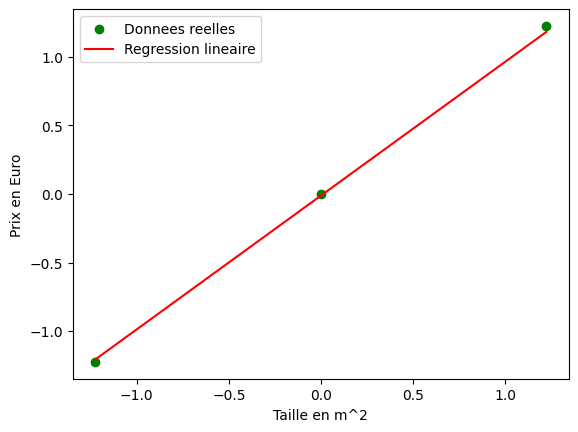

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim


X = [50, 100, 150]
Y = [100000, 200000, 300000]


X = (X - np.mean(X)) / np.std(X)  # Normaliser X
Y = (Y - np.mean(Y)) / np.std(Y)  # Normaliser Y

X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

model = nn.Linear(in_features=1, out_features=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 2000

for epoch in range(epochs):
  outputs = model(X)
  loss = criterion(outputs, Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch + 2)%200 == 0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():4f}")


X_new = torch.tensor([[120]], dtype=torch.float32)  # 120 m²
predicted_price = model(X_new).item()  # .item() pour obtenir la valeur numérique
print(f"Le prix prédit pour une maison de 120 m² est : {predicted_price:.2f} €")

predicted_values = model(X).detach().numpy()

plt.scatter(X.numpy(), Y.numpy(), color = "green", label = "Donnees reelles")
plt.plot(X, predicted_values, color = "red", label = "Regression lineaire")
plt.xlabel("Taille en m^2")
plt.ylabel("Prix en Euro")
plt.legend()
plt.show()

Correction Exercice 1

Epoch [1000/10000], Loss:0.033575
Epoch [2000/10000], Loss:0.000613
Epoch [3000/10000], Loss:0.000011
Epoch [4000/10000], Loss:0.000000
Epoch [5000/10000], Loss:0.000000
Epoch [6000/10000], Loss:0.000000
Epoch [7000/10000], Loss:0.000000
Epoch [8000/10000], Loss:0.000000
Epoch [9000/10000], Loss:0.000000
Epoch [10000/10000], Loss:0.000000
Pente (poids) : 0.9999850988388062
Ordonnée à l'origine (biais) : -1.150138118077848e-08
Le prix prédit pour une maison de 120 m² est : 120.00 €


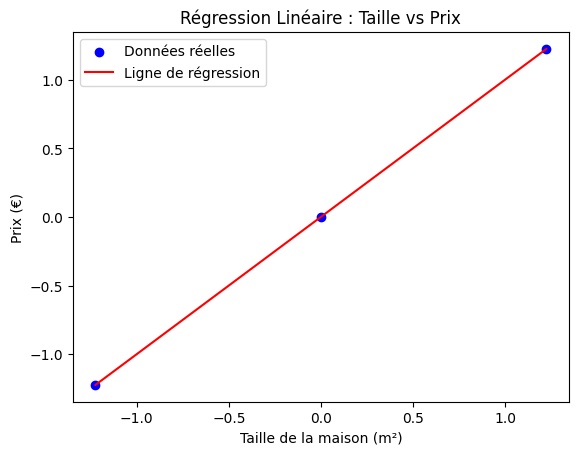

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Données d'exemple
X = np.array([50, 100, 150], dtype=np.float32)
Y = np.array([100000, 150000, 200000], dtype=np.float32)

# Normalisation des données
X = (X - np.mean(X)) / np.std(X)  # Normaliser X
Y = (Y - np.mean(Y)) / np.std(Y)  # Normaliser Y

# Conversion des données en tensors PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Créer un modèle de régression linéaire
model = nn.Linear(in_features=1, out_features=1)

# Fonction de perte et optimiseur
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Réduire le taux d'apprentissage

# Entraînement du modèle
epochs = 10000
for epoch in range(epochs):
    # Passer les données par le modèle
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)

    # Rétropropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Afficher la perte chaque 100 époques
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():4f}")

# Affichage des paramètres appris
print(f"Pente (poids) : {model.weight.item()}")
print(f"Ordonnée à l'origine (biais) : {model.bias.item()}")

# Prédire le prix d'une maison de 120 m² (normalisée)
X_new = torch.tensor([[(120 - np.mean(X)) / np.std(X)]], dtype=torch.float32)  # Normaliser la valeur de 120 m²
predicted_price = model(X_new).item()  # .item() pour obtenir la valeur numérique
# Dé-normaliser la prédiction
predicted_price_denorm = predicted_price * np.std(Y) + np.mean(Y)  # Revenir à l'échelle originale
print(f"Le prix prédit pour une maison de 120 m² est : {predicted_price_denorm:.2f} €")

# Prédictions et visualisation
predicted_values = model(X_tensor).detach().numpy()

# Tracer les données et la droite de régression
plt.scatter(X, Y, color='blue', label='Données réelles')
plt.plot(X, predicted_values, color='red', label='Ligne de régression')

plt.xlabel('Taille de la maison (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.title('Régression Linéaire : Taille vs Prix')
plt.show()


Exercice 2


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


X = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], dtype = np.float32) #Data input

Y = np.array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], dtype = np.float32) # Data Output

X = (X-np.mean(X))/np.std(X) #normalizer X
Y = (X-np.mean(X))/np.std(X) #normalizer Y

#Turning of Data into torch tensor

X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)


# Creation of linear regression model




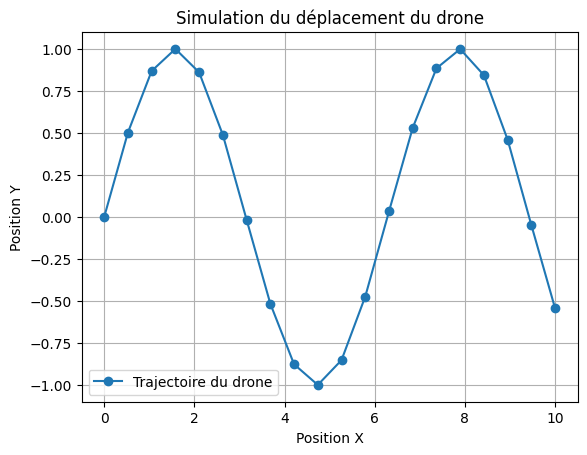

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Coordonnées du drone sur X et Y
x = np.linspace(0, 10, 20)  # Simulation d'un déplacement en X
y = np.sin(x)  # Simulation d'un déplacement en Y

plt.plot(x, y, marker='o', label="Trajectoire du drone")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.title("Simulation du déplacement du drone")
plt.legend()
plt.grid()
plt.show()


In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [21]:
X1 = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], dtype = np.float32)
X2 = np.array([1, 2, 3, 3, 4, 4, 5, 5, 6, 6], dtype = np.float32)
Y = np.array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000],dtype = np.float32)

X1 = (X1-np.mean(X1))/np.std(X1)
X2 = (X2-np.mean(X2))/np.std(X2)
Y = (Y-np.mean(Y))/np.std(Y)


X1 = torch.tensor(X1, dtype = torch.float32).view(-1, 1)
X2 = torch.tensor(X2, dtype = torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype = torch.float32).view(-1, 1)

X = torch.cat((X1, X2), dim=1)  # Combinaison des features

In [22]:
model = nn.Linear(in_features=2, out_features=2)

In [25]:
# Fonction de perte et optimiseur
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Réduire le taux d'apprentissage

# Entraînement du modèle
epochs = 10000
for epoch in range(epochs):
    # Passer les données par le modèle
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Rétropropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Afficher la perte chaque 100 époques
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():4f}")

print(f"Pentes (poids) : {model.weight.data.numpy()}")
print(f"Ordonnée à l'origine (biais) : {model.bias.data.numpy()}")


# Prédire le prix d'une maison de 120 m² (normalisée)
X_new1 = torch.tensor([[(250 - np.mean(X1)) / np.std(X1)]], dtype=torch.float32)  # Normaliser la valeur de 120 m²
X_new2 = torch.tensor([[(4 - np.mean(X2)) / np.std(X2)]], dtype=torch.float32)  # Normaliser la valeur de 120 m²

predicted_price1 = model(X_new1).item()  # .item() pour obtenir la valeur numérique
predicted_price2 = model(X_new2).item()  # .item() pour obtenir la valeur numérique

X_new = torch.tensor([[
    (250 - np.mean(X1.numpy())) / np.std(X1.numpy()),  # Surface normalisée
    (4 - np.mean(X2.numpy())) / np.std(X2.numpy())     # Chambres normalisées
]], dtype=torch.float32)

predicted_price = model(X_new).item()
predicted_price_denorm = predicted_price * np.std(Y.numpy()) + np.mean(Y.numpy())
print(f"Le prix prédit pour une maison de 250 m² et 4 chambres est : {predicted_price_denorm:.2f} €")

predicted_values = model(X).detach().numpy()

# Tracer les données et la droite de régression
plt.scatter(X, Y, color='blue', label='Données réelles')
plt.plot(X, predicted_values, color='red', label='Ligne de régression')

plt.xlabel('Taille de la maison (m²)')
plt.ylabel('Prix (€)')
plt.legend()
plt.title('Régression Linéaire : Taille vs Prix')
plt.show()


Epoch [1000/10000], Loss:0.001628
Epoch [2000/10000], Loss:0.001570
Epoch [3000/10000], Loss:0.001514
Epoch [4000/10000], Loss:0.001460
Epoch [5000/10000], Loss:0.001408
Epoch [6000/10000], Loss:0.001358
Epoch [7000/10000], Loss:0.001309
Epoch [8000/10000], Loss:0.001263
Epoch [9000/10000], Loss:0.001218
Epoch [10000/10000], Loss:0.001174
Pentes (poids) : [[0.9548207  0.0451803 ]
 [0.74989456 0.25010273]]
Ordonnée à l'origine (biais) : [1.7216745e-08 2.9799510e-08]


TypeError: mean() received an invalid combination of arguments - got (dtype=NoneType, out=NoneType, axis=NoneType, ), but expected one of:
 * (*, torch.dtype dtype = None)
 * (tuple of ints dim, bool keepdim = False, *, torch.dtype dtype = None)
 * (tuple of names dim, bool keepdim = False, *, torch.dtype dtype = None)


Epoch [1000/10000], Loss: 0.0312
Epoch [2000/10000], Loss: 0.0214
Epoch [3000/10000], Loss: 0.0198
Epoch [4000/10000], Loss: 0.0184
Epoch [5000/10000], Loss: 0.0171
Epoch [6000/10000], Loss: 0.0159
Epoch [7000/10000], Loss: 0.0148
Epoch [8000/10000], Loss: 0.0137
Epoch [9000/10000], Loss: 0.0128
Epoch [10000/10000], Loss: 0.0119
Pentes (poids) : [[0.4285422  0.57145756]]
Ordonnée à l'origine (biais) : [4.5603098e-08]
Le prix prédit pour une maison de 250 m² et 4 chambres est : 109.42 €


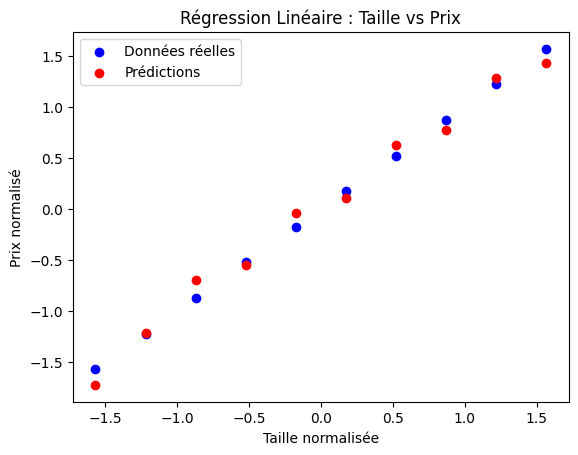

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Données
X1 = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], dtype=np.float32)
X2 = np.array([1, 2, 3, 3, 4, 4, 5, 5, 6, 6], dtype=np.float32)
Y = np.array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], dtype=np.float32)

# Normalisation
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)
Y = (Y - np.mean(Y)) / np.std(Y)

# Conversion en tenseurs
X1 = torch.tensor(X1, dtype=torch.float32).view(-1, 1)
X2 = torch.tensor(X2, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Combinaison des features
X = torch.cat((X1, X2), dim=1)

# Modèle
model = nn.Linear(in_features=2, out_features=1)

# Fonction de perte et optimiseur
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Entraînement
epochs = 10000
for epoch in range(epochs):
    outputs = model(X)
    loss = criterion(outputs, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Affichage des paramètres
print(f"Pentes (poids) : {model.weight.data.numpy()}")
print(f"Ordonnée à l'origine (biais) : {model.bias.data.numpy()}")

# Prédiction
X_new = torch.tensor([[  # surface = 250, chambres = 4
    (250 - np.mean(X1.numpy())) / np.std(X1.numpy()),
    (4 - np.mean(X2.numpy())) / np.std(X2.numpy())
]], dtype=torch.float32)

predicted_price = model(X_new).item()
predicted_price_denorm = predicted_price * np.std(Y.numpy()) + np.mean(Y.numpy())
print(f"Le prix prédit pour une maison de 250 m² et 4 chambres est : {predicted_price_denorm:.2f} €")

# Visualisation (avec X1 seulement)
predicted_values = model(X).detach().numpy()

plt.scatter(X1.numpy(), Y.numpy(), color='blue', label='Données réelles')
plt.scatter(X1.numpy(), predicted_values, color='red', label='Prédictions')
plt.xlabel('Taille normalisée')
plt.ylabel('Prix normalisé')
plt.legend()
plt.title('Régression Linéaire : Taille vs Prix')
plt.show()


Epoch 1000/10000, Loss: 0.0046
Epoch 2000/10000, Loss: 0.0022
Epoch 3000/10000, Loss: 0.0011
Epoch 4000/10000, Loss: 0.0005
Epoch 5000/10000, Loss: 0.0002
Epoch 6000/10000, Loss: 0.0001
Epoch 7000/10000, Loss: 0.0001
Epoch 8000/10000, Loss: 0.0000
Epoch 9000/10000, Loss: 0.0000
Epoch 10000/10000, Loss: 0.0000
Pentes (coefficients) : [[0.9865714  0.01342846]]
Biais (interception) : [7.3925763e-09]
Prix prédit pour une maison de 250 m² et 4 chambres : 500915.88 €


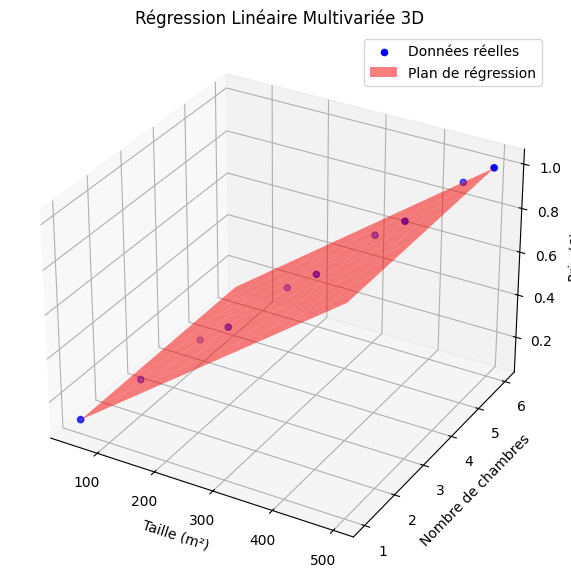

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Données
X1 = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], dtype=np.float32)
X2 = np.array([1, 2, 3, 3, 4, 4, 5, 5, 6, 6], dtype=np.float32)
Y = np.array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], dtype=np.float32)

# Normalisation
X1_mean, X1_std = np.mean(X1), np.std(X1)
X2_mean, X2_std = np.mean(X2), np.std(X2)
Y_mean, Y_std = np.mean(Y), np.std(Y)

X1_norm = (X1 - X1_mean) / X1_std
X2_norm = (X2 - X2_mean) / X2_std
Y_norm = (Y - Y_mean) / Y_std

# Tenseurs PyTorch
X = torch.tensor(np.column_stack((X1_norm, X2_norm)), dtype=torch.float32)
Y_tensor = torch.tensor(Y_norm, dtype=torch.float32).view(-1, 1)

# Modèle
model = nn.Linear(in_features=2, out_features=1)

# Perte et optimiseur
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entraînement
epochs = 10000
for epoch in range(epochs):
    output = model(X)
    loss = criterion(output, Y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Affichage des paramètres
weights = model.weight.data.numpy()
bias = model.bias.data.numpy()
print(f"Pentes (coefficients) : {weights}")
print(f"Biais (interception) : {bias}")

# Prédiction pour 250 m² et 4 chambres
x1_new = (250 - X1_mean) / X1_std
x2_new = (4 - X2_mean) / X2_std
X_new = torch.tensor([[x1_new, x2_new]], dtype=torch.float32)

predicted_norm = model(X_new).item()
predicted_price = predicted_norm * Y_std + Y_mean
print(f"Prix prédit pour une maison de 250 m² et 4 chambres : {predicted_price:.2f} €")

# -----------------
# VISUALISATION 3D
# -----------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Données réelles
ax.scatter(X1, X2, Y, color='blue', label='Données réelles')

# Surface de prédiction
X1_grid, X2_grid = np.meshgrid(np.linspace(X1.min(), X1.max(), 10),
                               np.linspace(X2.min(), X2.max(), 10))
X1_grid_norm = (X1_grid - X1_mean) / X1_std
X2_grid_norm = (X2_grid - X2_mean) / X2_std

X_grid_tensor = torch.tensor(np.stack([X1_grid_norm.ravel(), X2_grid_norm.ravel()], axis=1), dtype=torch.float32)
Y_pred_grid = model(X_grid_tensor).detach().numpy().reshape(X1_grid.shape)
Y_pred_grid = Y_pred_grid * Y_std + Y_mean  # dé-normalisation

# Tracer la surface
ax.plot_surface(X1_grid, X2_grid, Y_pred_grid, alpha=0.5, color='red', label='Plan de régression')

ax.set_xlabel('Taille (m²)')
ax.set_ylabel('Nombre de chambres')
ax.set_zlabel('Prix (€)')
ax.set_title('Régression Linéaire Multivariée 3D')
plt.legend()
plt.show()


Epoch : 1000/10000, Loss : 0.0705
Epoch : 2000/10000, Loss : 0.0353
Epoch : 3000/10000, Loss : 0.0347
Epoch : 4000/10000, Loss : 0.0347
Epoch : 5000/10000, Loss : 0.0347
Epoch : 6000/10000, Loss : 0.0347
Epoch : 7000/10000, Loss : 0.0347
Epoch : 8000/10000, Loss : 0.0347
Epoch : 9000/10000, Loss : 0.0347
Epoch : 10000/10000, Loss : 0.0347


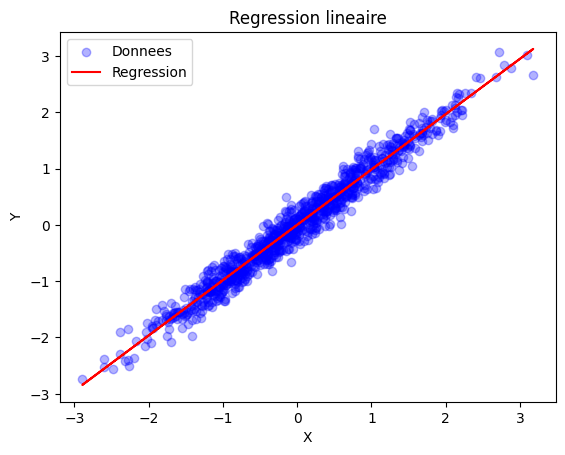

Erreur quadratique moyenne (MSE) : 0.0347
Fold 1, MSE : 0.0375
Fold 2, MSE : 0.0332


<ipython-input-43-2b27b2a55c32>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X[train_idx], dtype=torch.float32)
<ipython-input-43-2b27b2a55c32>:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(Y[train_idx].reshape(-1, 1), dtype=torch.float32)
<ipython-input-43-2b27b2a55c32>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X[test_idx], dtype=torch.float32)
<ipython-input-43-2b27b2a55c32>:59: UserWarning: To copy construct from a tensor, it is recommended to use sour

Fold 3, MSE : 0.0355
Fold 4, MSE : 0.0289
Fold 5, MSE : 0.0388

MSE moyenne après validation croisée : 0.0348


In [43]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_regression
import torch
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X, Y = make_regression(n_samples=1000, n_features=1, noise=0.1)

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

X = (X-np.mean(X))/np.std(X)
Y = (Y-np.mean(Y))/np.std(Y)

X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

model = nn.Linear(in_features=1, out_features=1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

epochs = 10000

for epoch in range(epochs):
  output = model(X)
  loss = criterion(output, Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch+1)%1000 == 0:
    print(f"Epoch : {epoch+1}/{epochs}, Loss : {loss.item():.4f}")

with torch.no_grad():
  predicted = model(X).numpy()

plt.scatter(X, Y, color='blue', alpha=0.3, label="Donnees")
plt.plot(X, predicted, color='red', label="Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Regression lineaire")
plt.show()

mse = mean_squared_error(Y, predicted)
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")

kf = KFold(n_splits=5)
mse_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train = torch.tensor(X[train_idx], dtype=torch.float32)
    Y_train = torch.tensor(Y[train_idx].reshape(-1, 1), dtype=torch.float32)
    X_test = torch.tensor(X[test_idx], dtype=torch.float32)
    Y_test = torch.tensor(Y[test_idx].reshape(-1, 1), dtype=torch.float32)

    model = nn.Linear(1, 1)
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    for epoch in range(300):  # moins d'époques ici
        pred = model(X_train)
        loss = criterion(pred, Y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        test_pred = model(X_test)
        test_loss = criterion(test_pred, Y_test).item()
        mse_scores.append(test_loss)
        print(f"Fold {fold+1}, MSE : {test_loss:.4f}")

print(f"\nMSE moyenne après validation croisée : {np.mean(mse_scores):.4f}")


[Global] Epoch 1000/10000, Loss: 0.0956
[Global] Epoch 2000/10000, Loss: 0.0766
[Global] Epoch 3000/10000, Loss: 0.0763
[Global] Epoch 4000/10000, Loss: 0.0763
[Global] Epoch 5000/10000, Loss: 0.0763
[Global] Epoch 6000/10000, Loss: 0.0763
[Global] Epoch 7000/10000, Loss: 0.0763
[Global] Epoch 8000/10000, Loss: 0.0763
[Global] Epoch 9000/10000, Loss: 0.0763
[Global] Epoch 10000/10000, Loss: 0.0763


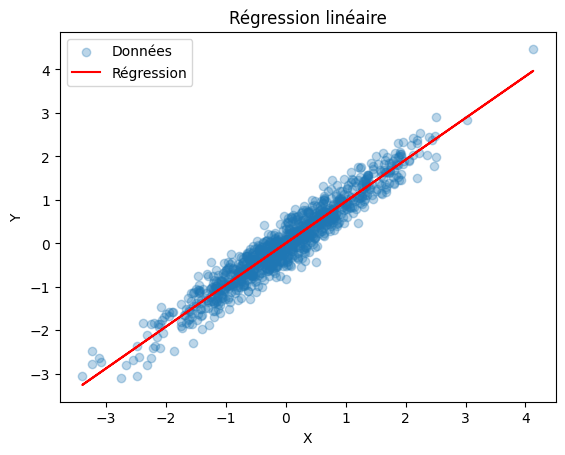

Erreur quadratique moyenne (MSE - global) : 0.0763
[Fold 1] MSE : 0.0694
[Fold 2] MSE : 0.0739
[Fold 3] MSE : 0.0724
[Fold 4] MSE : 0.0772
[Fold 5] MSE : 0.0912

MSE moyenne après validation croisée : 0.0768


In [42]:
# === Données ===
X, Y = make_regression(n_samples=1000, n_features=1, noise=0.1)
X = X.astype(np.float32)
Y = Y.astype(np.float32)

X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# === Modèle global ===
model_global = nn.Linear(in_features=1, out_features=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model_global.parameters(), lr=0.001)

epochs = 10000
for epoch in range(epochs):
    output = model_global(X_tensor)
    loss = criterion(output, Y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"[Global] Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# === Prédictions globales ===
with torch.no_grad():
    predicted = model_global(X_tensor).numpy()

# === Tracé ===
plt.scatter(X, Y, alpha=0.3, label="Données")
plt.plot(X, predicted, color='red', label="Régression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Régression linéaire")
plt.show()

mse = mean_squared_error(Y, predicted)
print(f"Erreur quadratique moyenne (MSE - global) : {mse:.4f}")

# === Validation croisée ===
kf = KFold(n_splits=5)
mse_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train = torch.tensor(X[train_idx], dtype=torch.float32)
    Y_train = torch.tensor(Y[train_idx].reshape(-1, 1), dtype=torch.float32)
    X_test = torch.tensor(X[test_idx], dtype=torch.float32)
    Y_test = torch.tensor(Y[test_idx].reshape(-1, 1), dtype=torch.float32)

    model_fold = nn.Linear(1, 1)
    optimizer = optim.SGD(model_fold.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    for epoch in range(300):
        pred = model_fold(X_train)
        loss = criterion(pred, Y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        test_pred = model_fold(X_test)
        test_loss = criterion(test_pred, Y_test).item()
        mse_scores.append(test_loss)
        print(f"[Fold {fold+1}] MSE : {test_loss:.4f}")

print(f"\nMSE moyenne après validation croisée : {np.mean(mse_scores):.4f}")
